In [1]:
import numpy
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test


11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

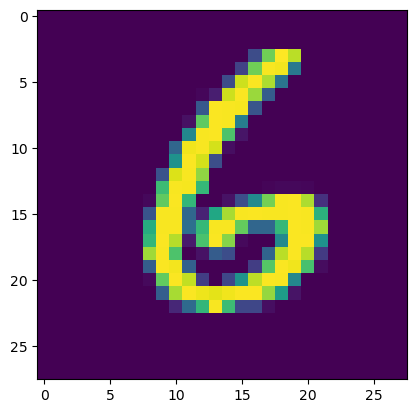

In [5]:
plt.imshow(x_train[6000])     #ploting the index=image

In [6]:
numpy.argmax(y_train[6000])

0

In [7]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

In [8]:
number_of_classes = 10  #storing the no of classes in a variable

In [9]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

In [10]:
#create model
model=Sequential ()

In [11]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [12]:
#flatten the dimension of the image
model.add(Flatten())

In [13]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

In [14]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [15]:
x_train = numpy.asarray(x_train)
y_train = numpy.asarray(y_train)

In [16]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 212s 109ms/step - loss: 0.2343 - accuracy: 0.9515 - val_loss: 0.0973 - val_accuracy: 0.9723
Epoch 2/5
1875/1875 [==============================] - 219s 117ms/step - loss: 0.0666 - accuracy: 0.9799 - val_loss: 0.1110 - val_accuracy: 0.9663
Epoch 3/5
1875/1875 [==============================] - 183s 97ms/step - loss: 0.0475 - accuracy: 0.9850 - val_loss: 0.0943 - val_accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 160s 85ms/step - loss: 0.0362 - accuracy: 0.9883 - val_loss: 0.0959 - val_accuracy: 0.9747
Epoch 5/5
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.1019 - val_accuracy: 0.9756


In [17]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.10187830030918121, 0.975600004196167]


In [18]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 6s 6s/step
[[1.2413231e-13 4.0926510e-15 2.0204852e-13 8.5849187e-04 1.7845260e-04
  5.4279004e-05 1.4596199e-14 2.1835026e-06 1.0488740e-05 9.9889612e-01]]


In [19]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [20]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

In [21]:
# Save the model
model.save('mnistCNN.h5')